In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def double2im(mat: np.ndarray):
    return (mat * 255).astype(np.uint8)

def im2double(img: np.ndarray):
    return img / 255.

def plot_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
import numpy as np 
import cv2
code=[
    np.array([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]),
    np.array([[0,0,0,0],[0,255,0,0],[0,0,0,0],[0,0,0,0]]),
    np.array([[0,0,0,0],[0,255,255,0],[0,0,0,0],[0,0,0,0]]),
    np.array([[0,0,0,0],[0,255,255,0],[0,255,0,0],[0,0,0,0]]),
    np.array([[0,0,0,0],[0,255,255,0],[0,255,255,0],[0,0,0,0]]),
    np.array([[0,255,0,0],[0,255,255,0],[0,255,255,0],[0,0,0,0]]),
    np.array([[0,255,0,0],[0,255,255,255],[0,255,255,0],[0,0,0,0]]),
    np.array([[0,255,0,0],[0,255,255,0],[0,255,255,0],[0,0,255,0]]),
    np.array([[0,255,0,0],[0,255,255,255],[255,255,255,0],[0,0,255,0]]),
    np.array([[0,255,255,0],[0,255,255,255],[255,255,255,0],[0,0,255,0]]),
    np.array([[0,255,255,0],[0,255,255,255],[255,255,255,255],[0,0,255,0]]),
    np.array([[0,255,255,0],[0,255,255,255],[255,255,255,255],[0,255,255,0]]),
    np.array([[0,255,255,0],[255,255,255,255],[255,255,255,255],[0,255,255,0]]),
    np.array([[0,255,255,255],[255,255,255,255],[255,255,255,255],[0,255,255,0]]),
    np.array([[0,255,255,255],[255,255,255,255],[255,255,255,255],[0,255,255,255]]),
    np.array([[0,255,255,255],[255,255,255,255],[255,255,255,255],[255,255,255,255]]),
    np.array([[255,255,255,255],[255,255,255,255],[255,255,255,255],[255,255,255,255]]),
]

In [ ]:
jarvis=[
       (0, 1, 7 / 48),
        (0, 2, 5 / 48),
        (1, -2, 3 / 48),
        (1, -1, 5 / 48),
        (1, 0, 7 / 48),
        (1, 1, 5 / 48),
        (1, 2, 3 / 48),
        (2, -2, 1 / 48),
        (2, -1, 3 / 48),
        (2, 0, 5 / 48),
        (2, 1, 3 / 48),
        (2, 2, 1 / 48),
]
Stucki =  [
        (1, 0, 8 / 42),
        (2, 0, 4 / 42),
        (-2, 1, 2 / 42),
        (-1, 1, 4 / 42),
        (0, 1, 8 / 42),
        (1, 1, 4 / 42),
        (2, 1, 2 / 42),
        (-2, 2, 1 / 42),
        (-1, 2, 2 / 42),
        (0, 2, 4 / 42),
        (1, 2, 2 / 42),
        (2, 2, 1 / 42),
]

In [ ]:
def error_diffusion(image: np.ndarray,
                    filtre: list[tuple[int, int, float]],
                    kernel: int,
                    thres: int = 127):
    height, width = image.shape[:2]
    padded_shape = (height + 2 * kernel, width + 2 * kernel)
    padded = np.full(padded_shape, thres)
    padded[kernel:-kernel, kernel:-kernel] = image
    rst = padded.copy()

    for i in range(kernel, padded.shape[0]-kernel):
        for j in range(kernel, padded.shape[1]-kernel):
            rst[i, j] = 255 if padded[i, j] > thres else 0
            # if padded[i, j] > thres:
            #     rst[i, j] = 255
            # else:
            #     rst[i, j] = 0
            error = int(-rst[i][j] + padded[i][j])
            for (dx, dy, val) in filtre:
                padded[i+dx][j+dy] += int(error * val)

    return rst[kernel:-kernel, kernel:-kernel]

In [ ]:
from pathlib import Path

original = cv2.imread(Path('data/test', 'input_image.png'))


for i in range(15):
    filename = f'FinalLayers_{i:02d}.png'
    rgb_image = cv2.imread(Path('data/test', filename), cv2.IMREAD_UNCHANGED)
    alpha = rgb_image[..., -1] / 255.
    height, width = rgb_image.shape[:2]
    image2 = np.zeros(shape=(height, width, 3))

    for c in range(3):
        # image = cv2.cvtColor(rgb_image[..., c], cv2.COLOR_BGR2GRAY) * alpha
        image = rgb_image[..., c] * alpha
        image2[..., c] = error_diffusion(image, Stucki, 4, thres=64)

    if not i:
        output = np.zeros((height, width, 3))

    output += image2

    cv2.imwrite(Path('data/results', filename), image2)

    # output[:, :, 0] += rgb_image[..., 0] * alpha
    # output[:, :, 1] += rgb_image[..., 1] * alpha
    # output[:, :, 2] += rgb_image[..., 2] * alpha

    # plt.figure(figsize=(10, 10))
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 3, 1)
    plt.imshow(rgb_image)
    # plt.imshow(image, cmap="gray")
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    # plt.subplot(1, 3, 3)
    # plt.imshow(image3)
    # plt.axis('off')

    plt.suptitle(filename)
    plt.show()

    # break

# output = output.astype(np.uint8)
# output[output > 255] = 255
# plt.imshow(output)
# plt.show()

In [ ]:
from pathlib import Path

original = cv2.imread(Path('data/test', 'input_image.png'))


for i in range(15):
    filename = f'FinalLayers_{i:02d}.png'
    rgb_image = cv2.imread(Path('data/test', filename), cv2.IMREAD_UNCHANGED)
    alpha = rgb_image[..., -1] / 255.
    for c in range(3):
        image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY) * alpha

        image2 = error_diffusion(image, Stucki, 4, thres=64)
        height, width = image2.shape

        if not i:
            output = np.zeros((height, width))

        output += image2

    # output[:, :, 0] += rgb_image[..., 0] * alpha
    # output[:, :, 1] += rgb_image[..., 1] * alpha
    # output[:, :, 2] += rgb_image[..., 2] * alpha

    # plt.figure(figsize=(10, 10))
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 3, 1)
    plt.imshow(rgb_image)
    # plt.imshow(image, cmap="gray")
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(image2)
    plt.axis('off')
    # plt.subplot(1, 3, 3)
    # plt.imshow(image3)
    # plt.axis('off')

    plt.suptitle(filename)
    plt.show()

    # break

# output = output.astype(np.uint8)
# output[output > 255] = 255
# plt.imshow(output)
# plt.show()

In [ ]:
# output = output.astype(np.uint8)
# output[output > 255] = 255

cv2.imwrite(Path('data/results', 'output.png'), output)

# plt.figure(figsize=(10, 15))
# plt.imshow(output, cmap='gray')
# plt.show()

In [ ]:
filename = f'FinalLayers_01.png'
rgb_image = cv2.imread(Path('data/test', filename), cv2.IMREAD_UNCHANGED)
alpha = rgb_image[..., -1] / 255.
image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY) * alpha
# image = cv2.imread(Path('data/test', filename), 0)

image2 = error_diffusion(image, jarvis, 4)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
# plt.subplot(1, 3, 2)
# plt.imshow(image1, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(image2, cmap="gray")

# plt.suptitle(filename)
plt.show()

In [ ]:
filename = f'FinalLayers_02.png'
rgb_image = cv2.imread(Path('data/test', filename))


plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(rgb_image[:64, :64, 0])
plt.subplot(1, 3, 2)
plt.imshow(rgb_image[:64, :64, 1])
plt.subplot(1, 3, 3)
plt.imshow(rgb_image[:64, :64, 2])
# plt.colorbar()  # Add a colorbar

In [ ]:
from tqdm import tqdm


for i in tqdm(range(15)):
    filename = f'FinalLayers_{i:02d}.png'
    image = cv2.imread(Path('data/test', filename), cv2.IMREAD_UNCHANGED)
    alpha = image[..., -1] / 255.
    image = cv2.cvtColor()

    if not i:
        output = np.zeros(shape=image.shape)

    image1 = tramme_ordonne(image, code, 4)
    image2 = error_diffusion(image, Stucki, 4)

    output += image2

    # plt.figure(figsize=(10, 10))
    # plt.figure(figsize=(15, 5))
    # plt.subplot(1, 3, 1)
    # plt.imshow(image, cmap="gray")
    # plt.subplot(1, 3, 2)
    # plt.imshow(image1, cmap="gray")
    # plt.subplot(1, 3, 3)
    # plt.imshow(image2, cmap="gray")

    # plt.suptitle(filename)
    # plt.show()

output = output.astype(np.uint8)
output[output > 255] = 255
plt.imshow(output[:128,:128], cmap='gray')
plt.show()

In [ ]:

plt.imshow(output[:128,:128], cmap='gray')
plt.show()

In [ ]:
filename = f'FinalLayers_12.png'
image = cv2.imread(Path('data/test', filename), cv2.IMREAD_UNCHANGED)
alpha = image[..., -1]
plt.imshow(alpha)

# image1 = tramme_ordonne(image, code, 4)
# image2 = error_diffusion(image, Stucki, 4)

# plt.figure(figsize=(10, 10))
# plt.figure(figsize=(15, 5))
# plt.subplot(1, 3, 1)
# plt.imshow(image[128:256, 128:256], cmap="gray")
# plt.subplot(1, 3, 2)
# plt.imshow(image1[512:1024, 512:1024], cmap="gray")
# plt.subplot(1, 3, 3)
# plt.imshow(image2[128:256, 128:256], cmap="gray")

# plt.suptitle(filename)
# plt.show()

In [ ]:
import numpy as np
import cv2
from pathlib import Path

In [ ]:
def add_paper_texture(source: np.ndarray, texture: np.ndarray):
    source = np.array(source)
    texture = np.array(texture)
    texture = cv2.resize(texture, (source.shape[1], source.shape[0]))

    norm_source = source / 255.0
    norm_texture = texture / 255.0

    norm_target = norm_source * norm_texture
    target = (norm_target * 255).astype(np.uint8)

    return target


In [ ]:
texture_path = Path('data', 'papers')
source_path = Path('data',  'test', 'recolor_drac_new.png')

for i, texture_path in enumerate(texture_path.iterdir()):
    source = cv2.imread(source_path)
    texture = cv2.imread(texture_path)
    
    target = add_paper_texture(source, texture)

    print(texture_path)
    cv2.imwrite(Path('output', f'blended_image_{i}.jpg'), target)

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

In [ ]:
image = Image.open('data/test/test_layer1.png')
img_arr = np.array(image)
img_arr.shape

In [ ]:
final_texture = None
thres = 0.02
num_layers = 0

for filename in Path('FSCS/src/results/sample/supes_crop_old.png').iterdir():
    if not filename.name.startswith('img-00'):
        continue

    image = Image.open(filename)
    img_arr = np.array(image)

    alpha_layer = img_arr[..., -1] / 255.
    # plt.imshow(alpha_layer, vmin=0, vmax=1, cmap='gray')
    # plt.show()

    if final_texture is None:
        final_texture = np.zeros(alpha_layer.shape)

    texture = np.zeros(alpha_layer.shape)
    texture[1:, :] += np.abs(alpha_layer[1:, :] - alpha_layer[:-1, :])
    texture[:-1, :] += np.abs(alpha_layer[:-1, :] - alpha_layer[1:, :])
    texture[:, 1:] += np.abs(alpha_layer[:, 1:] - alpha_layer[:, :-1])
    texture[:, :-1] += np.abs(alpha_layer[:, :-1] - alpha_layer[:, 1:])
    texture = texture / 4.
    # texture[texture > thres] = 255
    texture[texture <= thres] = 0
    texture[texture > thres] = 1

    plt.imshow(texture, vmin=0, vmax=1, cmap='gray')
    plt.show()

    final_texture += texture * alpha_layer
    num_layers  += 1

# final_texture /= num_layers
final_texture[final_texture > 1] = 1
final_texture = (final_texture * 255).astype(np.uint8)
plt.imshow(final_texture, vmin=0, vmax=255, cmap='gray')
plt.show()

cv2.imwrite('test_texture.png', final_texture)


In [ ]:
new_page_arr = cv2.imread('FSCS/src/results/sample/supes_crop_new.png/test_img-00_target_img.png')

new_page_arr = new_page_arr / 255.
texture = cv2.resize(final_texture, new_page_arr.shape[:2][::-1])
texture = texture / 255.
print(texture)
plt.imshow(texture, cmap='gray')
output = np.einsum('ijk,ij->ijk', new_page_arr, (1 - texture))
# output += np.einsum('ijk,ij->ijk', new_page_arr, )
output = (output * 255).astype(np.uint8)

# plt.imshow(texture, cmap='gray')
# output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
plt.imshow(output)
plt.show()

cv2.imwrite('test_output.png', output)


In [ ]:
from pathlib import Path
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dirname = 'data/patterns-0415/results-patterns-0415-1-results/output_layers'
dir_path = Path(dirname)

for filename in dir_path.glob('FinalLayers_*.png'):
    image = Image.open(filename)
    img_arr = np.array(image)
    alpha = img_arr[..., -1] 
    plt.imshow(alpha, cmap='gray')
    plt.axis('off')
    plt.title(filename.name)
    plt.show()

In [ ]:
plt.imshow(alpha, cmap='gray')

In [ ]:
w_slice = slice(210, 270)
h_slice = slice(85, 150)

sub_hf = alpha[h_slice, w_slice, ...]
plt.imshow(sub_hf, cmap='gray')
cv2.imwrite('output/texture/1.png', sub_hf)

In [ ]:
dirname = 'data/patterns-0415/results-patterns-0415-2-results/output_layers'
dir_path = Path(dirname)

for filename in dir_path.glob('FinalLayers_*.png'):
    image = Image.open(filename)
    img_arr = np.array(image)
    alpha = img_arr[..., -1] 
    plt.imshow(alpha, cmap='gray')
    plt.axis('off')
    plt.title(filename.name)
    plt.show()

    if "02" in filename.name:
        break

In [ ]:
plt.imshow(alpha, cmap='gray')

In [ ]:
w_slice = slice(1110, 1190)
h_slice = slice(110, 190)

sub_hf = alpha[h_slice, w_slice, ...]
plt.imshow(sub_hf, cmap='gray')
cv2.imwrite('output/texture/2.png', sub_hf)

In [ ]:
dirname = 'data/patterns-0415/results-patterns-0415-3-results/output_layers'
dir_path = Path(dirname)

for filename in dir_path.glob('FinalLayers_*.png'):
    image = Image.open(filename)
    img_arr = np.array(image)
    alpha = img_arr[..., -1] 
    plt.imshow(alpha, cmap='gray')
    plt.axis('off')
    plt.title(filename.name)
    plt.show()

    if "01" in filename.name:
        break

In [ ]:
plt.imshow(alpha, cmap='gray')

In [ ]:
w_slice = slice(110, 220)
h_slice = slice(65, 135)

sub_hf = alpha[h_slice, w_slice, ...]
plt.imshow(sub_hf, cmap='gray')
cv2.imwrite('output/texture/3.png', sub_hf)

In [ ]:
dirname = 'data/patterns-0415/results-patterns-0415-4-results/output_layers'
dir_path = Path(dirname)

for filename in dir_path.glob('FinalLayers_*.png'):
    image = Image.open(filename)
    img_arr = np.array(image)
    alpha = img_arr[..., -1] 
    plt.imshow(alpha, cmap='gray')
    plt.axis('off')
    plt.title(filename.name)
    plt.show()

    if "03" in filename.name:
        break

In [ ]:
plt.imshow(alpha, cmap='gray')

In [ ]:
w_slice = slice(320, 450)
h_slice = slice(0, 120)

sub_hf = alpha[h_slice, w_slice, ...]
plt.imshow(sub_hf, cmap='gray', vmin=0, vmax=255)
cv2.imwrite('output/texture/4.png', sub_hf)

In [12]:
from scipy.ndimage import convolve

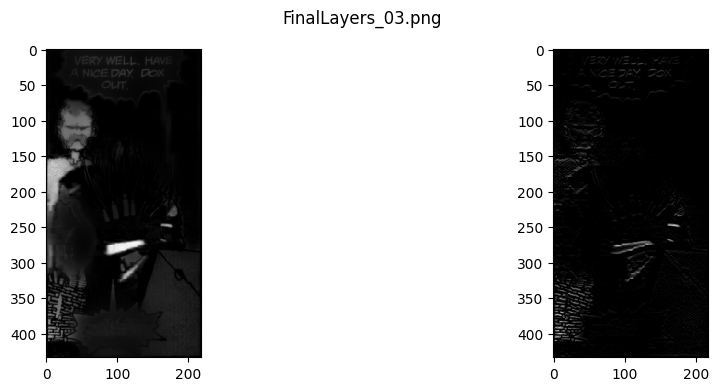

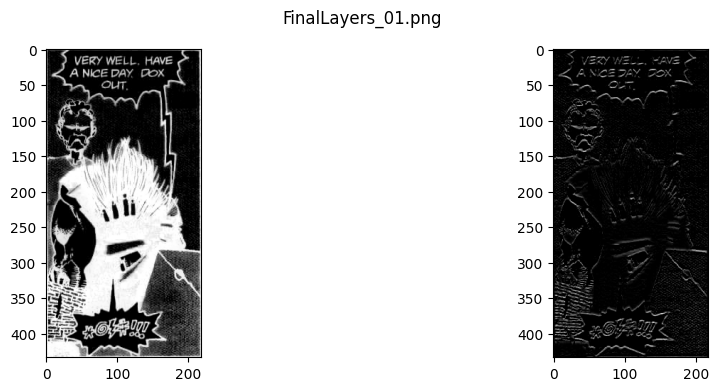

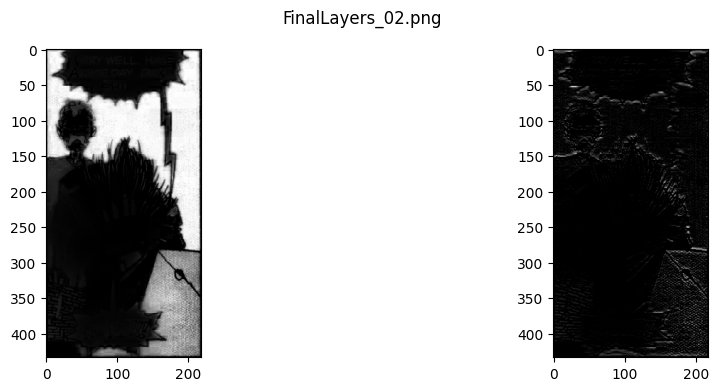

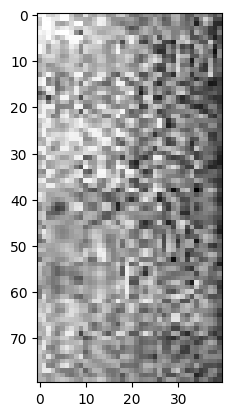

In [104]:
dirname = 'data/patterns-0415/results-patterns-0415-other-7-results/output_layers'
dir_path = Path(dirname)

kernel = cv2.getGaussianKernel(15, 2)
for filename in dir_path.glob('FinalLayers_*.png'):
    image = Image.open(filename)
    img_arr = np.array(image)
    alpha = img_arr[..., -1] / 255
    filtered_alpha = convolve(alpha, kernel, mode='nearest')
    high_freq = alpha - filtered_alpha
    high_freq[high_freq < 0] = 0
    high_freq = high_freq / high_freq.max()
    high_freq = (high_freq * 255).astype(np.uint8)
    
    plt.figure(figsize=((12, 4)))
    plt.subplot(1, 2, 1)
    plt.imshow(alpha * 255, cmap='gray', vmin=0, vmax=255)
    plt.subplot(1, 2, 2)
    plt.imshow(high_freq, cmap='gray', vmin=0, vmax=255)
    # plt.axis('off')
    plt.suptitle(filename.name)
    plt.show()

    if "02" in filename.name:
        break

w_slice = slice(175, 215)
h_slice = slice(350, 430)

sub_hf = alpha[h_slice, w_slice, ...]
plt.imshow(sub_hf, cmap='gray')

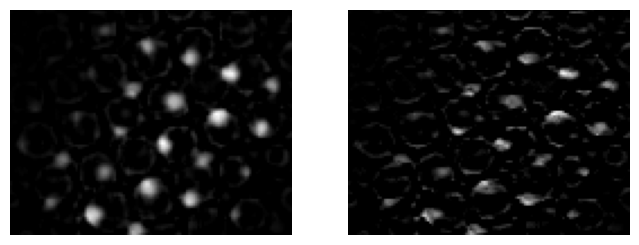

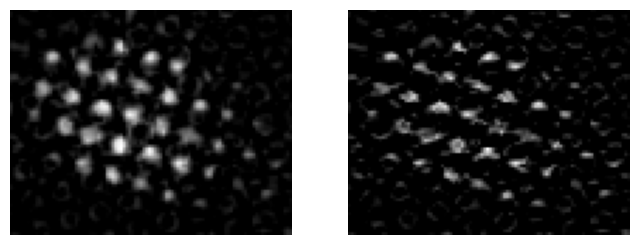

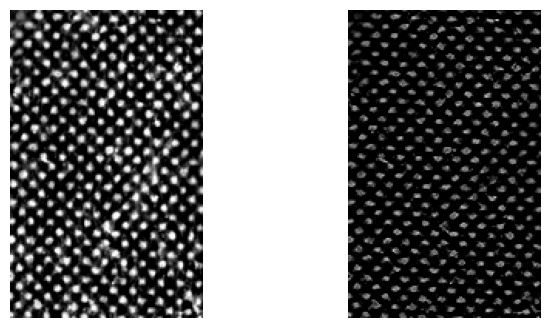

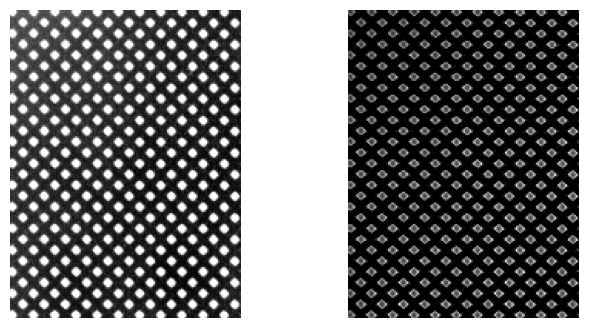

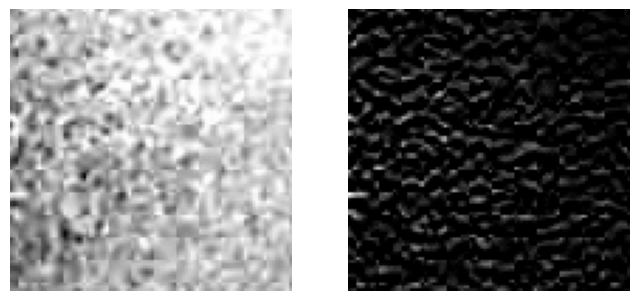

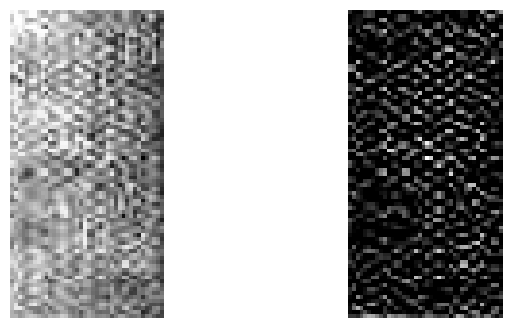

In [115]:
params = [
    {
    },
    {
        'fid': '04',
        'w_slice': (50, 175),
        'h_slice': (100, 200)
    },
    {
        'fid': '02',
        'w_slice': (90, 190),
        'h_slice': (240, 320)
    },
    {
        'fid': '01',
        'w_slice': (150, 275),
        'h_slice': (0, 200)
    },
    {
        'fid': '01',
        'w_slice': (50, 200),
        'h_slice': (50, 250)
    },
    {
        'fid': '00',
        'w_slice': (1400, 1500),
        'h_slice': (200, 300)
    },
    {
        'fid': '02',
        'w_slice': (175, 215),
        'h_slice': (350, 430)
    }
]

kernel = cv2.getGaussianKernel(15, 2)

for i in range(len(params)):
    if i == 0:
        continue

    dirname = f'data/patterns-0415/results-patterns-0415-other-{i+1}-results/output_layers'
    dir_path = Path(dirname)
    fid = params[i]['fid']

    for filename in dir_path.glob('FinalLayers_*.png'):
        image = Image.open(filename)
        img_arr = np.array(image)
        alpha = img_arr[..., -1] / 255
        filtered_alpha = convolve(alpha, kernel, mode='nearest')
        high_freq = alpha - filtered_alpha
        # high_freq = ((high_freq + 1) / 2 * 255).astype(np.uint8)
        high_freq[high_freq < 0] = 0
        high_freq = high_freq / high_freq.max()
        high_freq = (high_freq * 255).astype(np.uint8)
        # plt.imshow(high_freq, cmap='gray')
        # plt.axis('off')
        # plt.title(filename.name)
        # plt.show()

        if fid in filename.name:
            break

    w_slice = slice(*params[i]['w_slice'])
    h_slice = slice(*params[i]['h_slice'])

    sub_hf = high_freq[h_slice, w_slice, ...]
    sub_alpha = alpha[h_slice, w_slice, ...]
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(sub_alpha, cmap='gray')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(sub_hf, cmap='gray')
    plt.axis('off')

    cv2.imwrite(f'output/texture/oth-h{i+1}.png', sub_hf)
    cv2.imwrite(f'output/texture/oth-{i+1}.png', sub_alpha * 255)

    # break

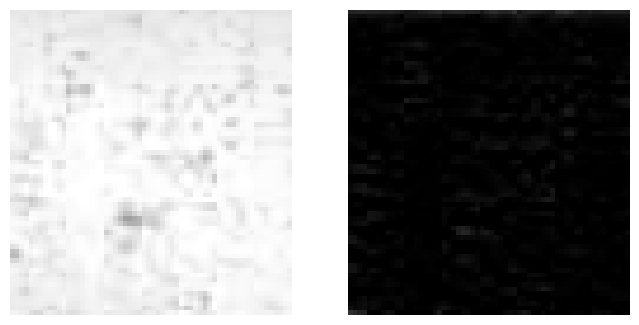

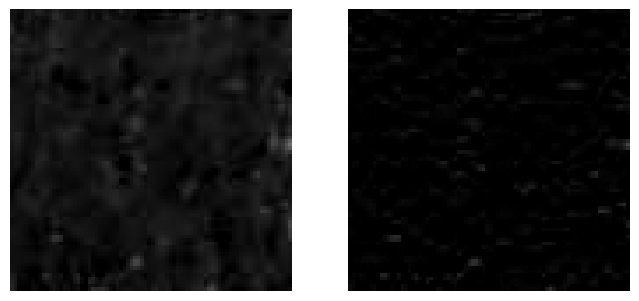

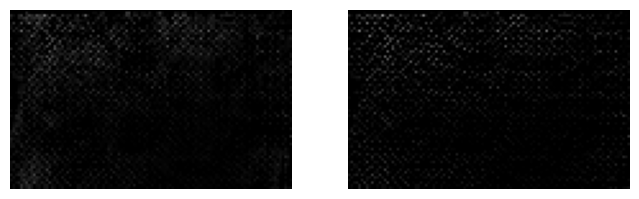

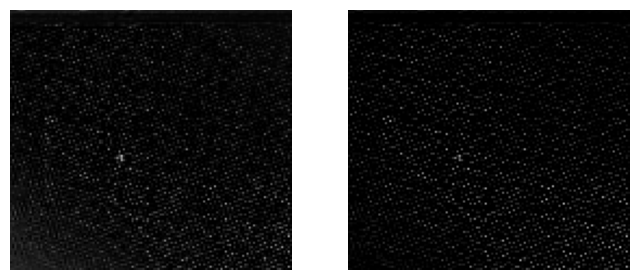

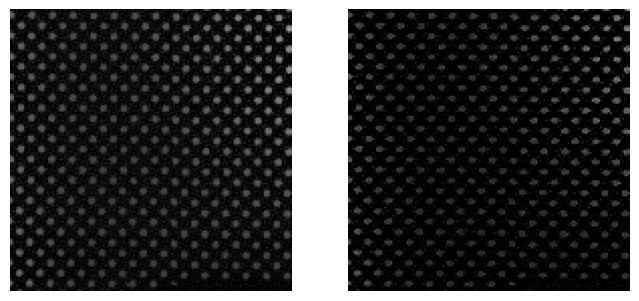

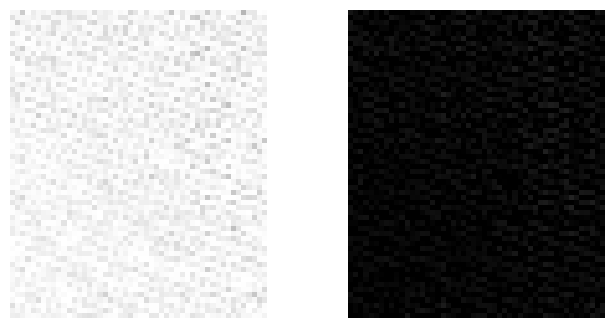

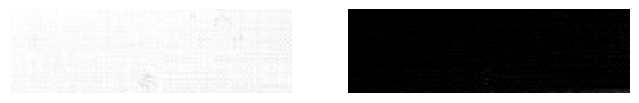

In [111]:
params = [
    {
        'fid': '00',
        'w_slice': (210, 270),
        'h_slice': (85, 150)
    },
    {
        'fid': '02',
        'w_slice': (1110, 1190),
        'h_slice': (110, 190)
    },
    {
        'fid': '01',
        'w_slice': (110, 220),
        'h_slice': (65, 135)
    },
    {
        'fid': '03',
        'w_slice': (320, 450),
        'h_slice': (0, 120)
    },
    {
        'fid': '01',
        'w_slice': (300, 440),
        'h_slice': (230, 370)
    },
    {
        'fid': '02',
        'w_slice': (750, 800),
        'h_slice': (240, 300)
    },
    {
        'fid': '00',
        'w_slice': (500, 635),
        'h_slice': (360, 400)
    }
]

kernel = cv2.getGaussianKernel(15, 2)

for i in range(len(params)):
    dirname = f'data/patterns-0415/results-patterns-0415-{i+1}-results/output_layers'
    dir_path = Path(dirname)
    fid = params[i]['fid']

    for filename in dir_path.glob('FinalLayers_*.png'):
        image = Image.open(filename)
        img_arr = np.array(image)
        alpha = img_arr[..., -1] / 255
        filtered_alpha = convolve(alpha, kernel, mode='nearest')
        high_freq = alpha - filtered_alpha
        # high_freq = ((high_freq + 1) / 2 * 255).astype(np.uint8)
        high_freq[high_freq < 0] = 0
        high_freq = high_freq / high_freq.max()
        high_freq = (high_freq * 255).astype(np.uint8)
        # plt.imshow(high_freq, cmap='gray')
        # plt.axis('off')
        # plt.title(filename.name)
        # plt.show()

        if fid in filename.name:
            break

    w_slice = slice(*params[i]['w_slice'])
    h_slice = slice(*params[i]['h_slice'])

    sub_hf = high_freq[h_slice, w_slice, ...]
    sub_alpha = alpha[h_slice, w_slice, ...]
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(sub_alpha * 255, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(sub_hf, cmap='gray', vmin=0, vmax=255)
    plt.axis('off')

    cv2.imwrite(f'output/texture/h{i+1}.png', sub_hf)
    cv2.imwrite(f'output/texture/{i+1}.png', sub_alpha * 255)

    # break

In [ ]:
w_slice = slice(210, 270)
h_slice = slice(85, 150)

sub_hf = alpha[h_slice, w_slice, ...]
plt.imshow(sub_hf, cmap='gray')

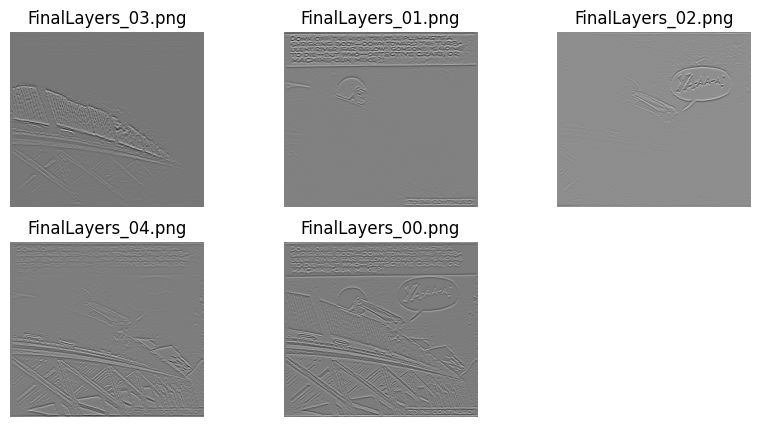

In [ ]:
kernel = cv2.getGaussianKernel(15, 2)
dirname = 'data/patterns-0415/results-patterns-0415-1-results/output_layers'
dir_path = Path(dirname)
plt.figure(figsize=(10, 5))

for i, filename in enumerate(dir_path.glob('FinalLayers_*.png')):
    image = Image.open(filename)
    img_arr = np.array(image)
    alpha = img_arr[..., -1] / 255
    filtered_alpha = convolve(alpha, kernel, mode='nearest')
    high_freq = alpha - filtered_alpha
    plt.subplot(2, 3, i+1)
    plt.imshow(high_freq, cmap='gray')
    plt.axis('off')
    plt.title(filename.name)
plt.show()

In [24]:
high_freq.min(), high_freq.max()

(np.float64(-0.6249635162139412), np.float64(0.6567685824471334))